Random Forest:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     50839
        True       1.00      1.00      1.00     29161

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

Precisión: 1.0000, Recall: 1.0000, F1-score: 1.0000

XGBoost:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     50839
        True       1.00      1.00      1.00     29161

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

Precisión: 0.9999, Recall: 0.9999, F1-score: 0.9999



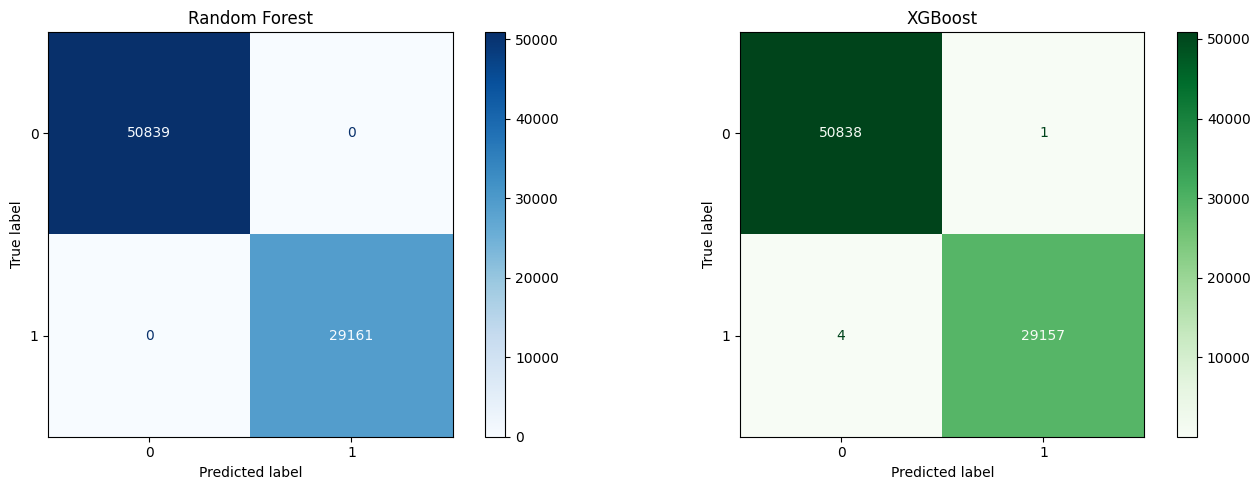


Comparación de métricas:
           Modelo  Precisión    Recall  F1-score
0  Random Forest   1.000000  1.000000  1.000000
1        XGBoost   0.999938  0.999863  0.999914


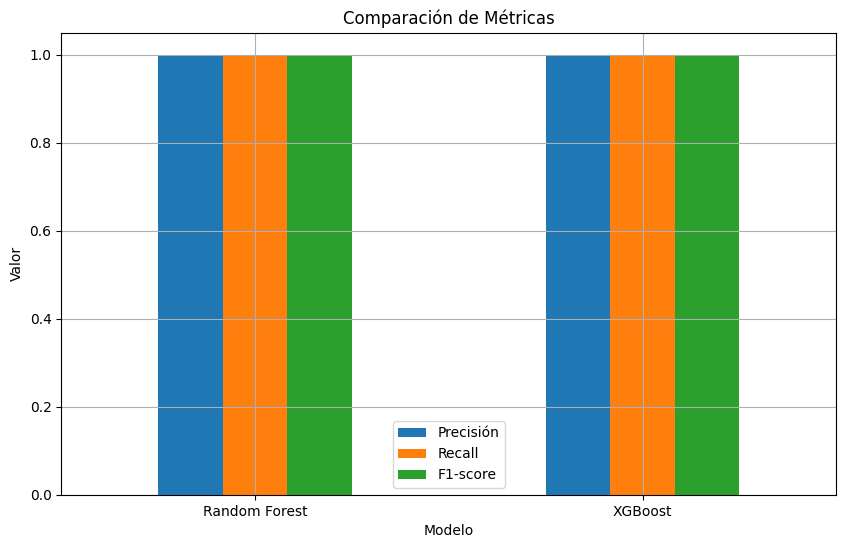

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, recall_score, f1_score
import joblib

X_train = pd.read_csv('X_train_preprocessed.csv')
y_train = pd.read_csv('y_train.csv')

rf_model = joblib.load('random_forest_model.pkl')
xgb_model = joblib.load('xgboost_model.pkl')

y_pred_rf = rf_model.predict(X_train)
y_pred_xgb = xgb_model.predict(X_train)

conf_rf = confusion_matrix(y_train, y_pred_rf)
report_rf = classification_report(y_train, y_pred_rf)
acc_rf = accuracy_score(y_train, y_pred_rf)
recall_rf = recall_score(y_train, y_pred_rf)
f1_rf = f1_score(y_train, y_pred_rf)

conf_xgb = confusion_matrix(y_train, y_pred_xgb)
report_xgb = classification_report(y_train, y_pred_xgb)
acc_xgb = accuracy_score(y_train, y_pred_xgb)
recall_xgb = recall_score(y_train, y_pred_xgb)
f1_xgb = f1_score(y_train, y_pred_xgb)

print("Random Forest:\n", report_rf)
print(f"Precisión: {acc_rf:.4f}, Recall: {recall_rf:.4f}, F1-score: {f1_rf:.4f}\n")

print("XGBoost:\n", report_xgb)
print(f"Precisión: {acc_xgb:.4f}, Recall: {recall_xgb:.4f}, F1-score: {f1_xgb:.4f}\n")

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ConfusionMatrixDisplay(conf_rf).plot(ax=ax[0], cmap='Blues')
ax[0].set_title("Random Forest")

ConfusionMatrixDisplay(conf_xgb).plot(ax=ax[1], cmap='Greens')
ax[1].set_title("XGBoost")

plt.tight_layout()
plt.show()

metrics_df = pd.DataFrame({'Modelo': ['Random Forest', 'XGBoost'],'Precisión': [acc_rf, acc_xgb],'Recall': [recall_rf, recall_xgb],'F1-score': [f1_rf, f1_xgb]})

print("\nComparación de métricas:\n", metrics_df)

metrics_df.set_index('Modelo').plot(kind='bar', figsize=(10, 6))
plt.title("Comparación de Métricas")
plt.ylabel("Valor")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()
